In [6]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import load_model
from keras.preprocessing import image

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
img_width, img_height = 150, 150
def load_and_preprocess_data(data_dir):
    images = []
    labels = []

    for label, category in enumerate(['Cat', 'Dog']):
        category_dir = os.path.join(data_dir, category)
        for img_name in os.listdir(category_dir):
            img_path = os.path.join(category_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, (img_width, img_height))
            img = img / 255.0  # Normalize pixel values to range [0, 1]
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)


In [10]:
train_data_dir = r'C:\Users\Admin\Desktop\BharatIntern\Project 2\kagglecatsanddogs_3367a\Petimages'
train_images, train_labels = load_and_preprocess_data(train_data_dir)


In [11]:
print("Number of training images:", len(train_images))
print("Number of cat images:", np.sum(train_labels == 0))
print("Number of dog images:", np.sum(train_labels == 1))


Number of training images: 1996
Number of cat images: 996
Number of dog images: 1000


In [12]:
model = Sequential(name="my_cnn_model")
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, so using sigmoid activation

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Since it's a binary classification problem
              metrics=['accuracy'])

# Display the model summary
model.summary()

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "my_cnn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,367,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,460,865 (9.39 MB)

 Trainable params: 2,460,865 (9.39 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(train_images, train_labels)

print("Training Loss:", train_loss)
print("Training Accuracy:", train_accuracy)

# Saving the model in the Keras format
model.save("my_cnn_model.keras")
print("Model saved as my_cnn_model.keras")

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.5772 - loss: 0.7792 - val_accuracy: 0.0000e+00 - val_loss: 0.9312
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.6265 - loss: 0.6514 - val_accuracy: 0.0150 - val_loss: 1.2280
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.6723 - loss: 0.6161 - val_accuracy: 0.2650 - val_loss: 1.0639
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.7489 - loss: 0.5400 - val_accuracy: 0.3300 - val_loss: 1.0092
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.7838 - loss: 0.4858 - val_accuracy: 0.3775 - val_loss: 1.2177
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.8087 - loss: 0.4015 - val_accuracy: 0.4200 - val_loss: 1.4797
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.8393 - loss: 0.3375 - val_accuracy: 0.5225 - val_loss: 1.4826
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.8921 - loss: 0.2462 - val_accuracy: 0.5425 - val_

C:\Users\Admin\AppData\Local\Temp\ipykernel_13332\1882817585.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = class_names[int(np.round(predictions[0]))]  # Use int(np.round(predictions[0])) to get the predicted class index


╒══════════════╤═══════════════════╕
│ Image Name   │ Predicted Class   │
╞══════════════╪═══════════════════╡
│ cat.1950.jpg │ Cat               │
├──────────────┼───────────────────┤
│ cat.1951.jpg │ Dog               │
├──────────────┼───────────────────┤
│ cat.1952.jpg │ Dog               │
├──────────────┼───────────────────┤
│ cat.1953.jpg │ Cat               │
├──────────────┼───────────────────┤
│ cat.1954.jpg │ Cat               │
├──────────────┼───────────────────┤
│ cat.1955.jpg │ Cat               │
├──────────────┼───────────────────┤
│ cat.1956.jpg │ Cat               │
├──────────────┼───────────────────┤
│ cat.1957.jpg │ Cat               │
├──────────────┼───────────────────┤
│ cat.1958.jpg │ Cat               │
├──────────────┼───────────────────┤
│ cat.1959.jpg │ Cat               │
├──────────────┼───────────────────┤
│ cat.1960.jpg │ Dog               │
├──────────────┼───────────────────┤
│ cat.1961.jpg │ Cat               │
├──────────────┼───────────────────┤
│

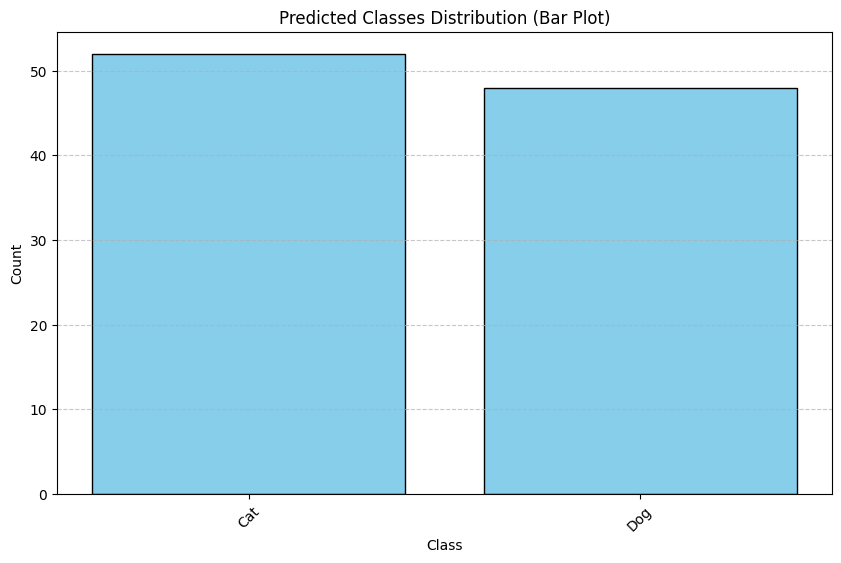

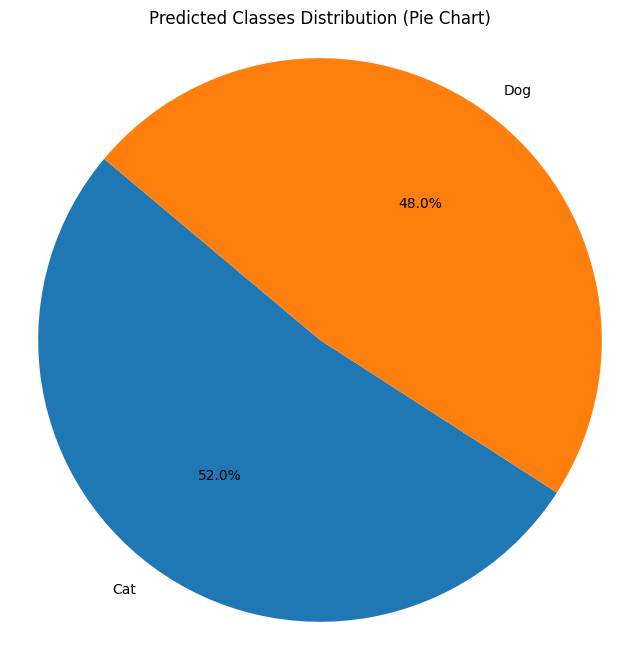

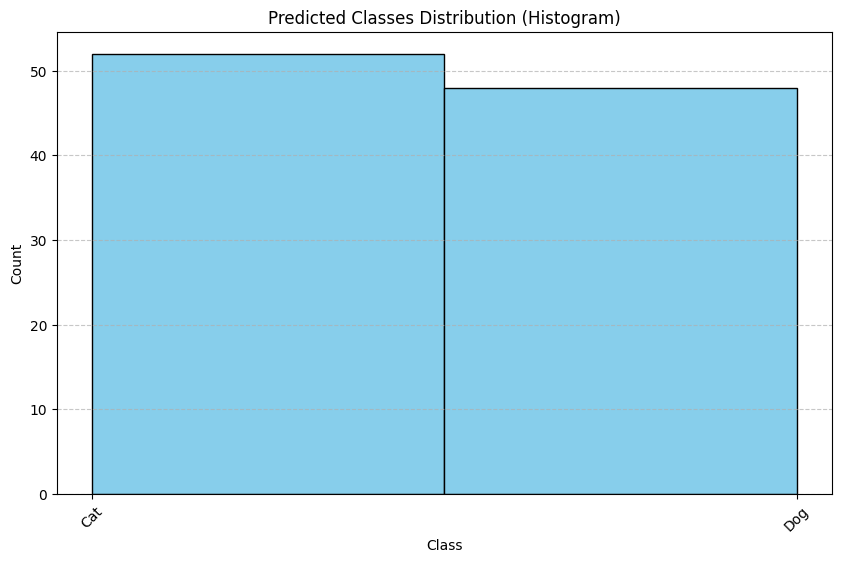

In [31]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.preprocessing import image
from tabulate import tabulate
from colorama import Fore, Style
import matplotlib.pyplot as plt

# Function to load and preprocess data
def load_and_preprocess_data(data_dir):
    images = []
    labels = []

    for label, category in enumerate(['Cat', 'Dog']):
        category_dir = os.path.join(data_dir, category)
        for img_name in os.listdir(category_dir):
            img_path = os.path.join(category_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, (img_width, img_height))
            img = img / 255.0  # Normalize pixel values to range [0, 1]
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Define image dimensions
img_width, img_height = 150, 150

# Path to the folder containing the test images
test_dir = r"C:\Users\Admin\Desktop\BharatIntern\Project 2\kagglecatsanddogs_3367a\Petimages\Test_data"

# Load the saved model
model = load_model("my_cnn_model.keras")

# Get the list of class names (folder names)
class_names = sorted(os.listdir(test_dir))

# Initialize lists to store prediction results
predictions_table = []

# Loop through each image in the test directory
for class_name in class_names:
    class_dir = os.path.join(test_dir, class_name)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        
        # Load and preprocess the image
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_width, img_height))
        img = img / 255.0  # Normalize pixel values to range [0, 1]
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        
        # Make predictions without verbose output
        predictions = model.predict(img, verbose=0)
        predicted_class = class_names[int(np.round(predictions[0]))]  # Use int(np.round(predictions[0])) to get the predicted class index
        
        # Store prediction results
        predictions_table.append([img_file, predicted_class])

# Print predictions table with color
headers = [Fore.BLUE + "Image Name", Fore.GREEN + "Predicted Class"]
print(tabulate([(Fore.BLUE + row[0], Fore.GREEN + row[1]) for row in predictions_table], headers=headers, tablefmt="fancy_grid", numalign="center"))

# Evaluate the model on the test data without verbose output
test_images, test_labels = load_and_preprocess_data(test_dir)
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
print(f"{Fore.YELLOW}Test Loss:", test_loss)
print(f"{Fore.YELLOW}Test Accuracy:", test_accuracy)

# Plotting predictions
predicted_classes = [class_names[int(np.round(predictions[0]))] for predictions in model.predict(test_images)]

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_names, [predicted_classes.count(cls) for cls in class_names], color='skyblue', edgecolor='black')
plt.title('Predicted Classes Distribution (Bar Plot)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie([predicted_classes.count(cls) for cls in class_names], labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title('Predicted Classes Distribution (Pie Chart)')
plt.axis('equal')
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(predicted_classes, bins=len(class_names), color='skyblue', edgecolor='black')
plt.title('Predicted Classes Distribution (Histogram)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
